<a href="https://colab.research.google.com/github/aghapygad336/X-Ray/blob/master/X_Ray_MURA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import os
import glob
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_imgs_path=pd.read_csv('/content/drive/My Drive/MURA/train_image_paths.csv',names=["Train Dataset"])
train_labels=pd.read_csv('/content/drive/My Drive/MURA/train_labeled_studies.csv',names=["Train Labeled Studies","label"])
test_imgs_path=pd.read_csv('/content/drive/My Drive/MURA/valid_image_paths.csv',names=["Test Dataset"])
test_labels=pd.read_csv('/content/drive/My Drive/MURA/valid_labeled_studies.csv',names=["Test Labeled Studies","labels"])


In [0]:
def convertThenumpy(_numpy):
    nData=[]
    for i in range(0,len(_numpy)):
        f1=_numpy[i]
        for image_path in glob.glob(f1):
            _imgs = imageio.imread(image_path)
            nData.append(_imgs)
    return nData    


In [0]:
train_labels_one = train_labels[train_labels['label'] ==1]

In [0]:
train_labels_zero=train_labels[train_labels['label'] ==0]

In [7]:
train_labels.shape

(13457, 2)

In [8]:
train_labels_one.shape

(5177, 2)

In [0]:
train_labels_zero.shape

(8280, 2)

In [0]:

test_labels_one = test_labels[test_labels['labels'] ==1]
test_labels_zero = test_labels[test_labels['labels'] ==0]

In [0]:
train_imgs_path_numpy_spervised_label_One=train_labels_one['Train Labeled Studies'].to_numpy()
train_imgs_path_numpy_spervised_label_Zero=train_labels_zero['Train Labeled Studies'].to_numpy()


In [0]:
test_imgs_path_numpy_spervised_label_One=test_labels_one['Test Labeled Studies'].to_numpy()
test_imgs_path_numpy_spervised_label_Zero=test_labels_zero['Test Labeled Studies'].to_numpy()


In [12]:
print(train_imgs_path_numpy_spervised_label_One.shape)
print(train_imgs_path_numpy_spervised_label_Zero.shape)
print(test_imgs_path_numpy_spervised_label_One.shape)
print(test_imgs_path_numpy_spervised_label_Zero.shape)


(5177,)
(8280,)
(538,)
(661,)


In [0]:
def fileImagesOfStudy(path):
    img_dir = path # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    i=0
    for f1 in files:
        i=i+1
        img = cv2.imread(f1)
        data.append(img)
        mydata = np.array(data)
    return data

In [0]:
type(test_imgs_path_numpy_spervised_label_Zero)

numpy.ndarray

In [0]:
f=test_imgs_path_numpy_spervised_label_Zero[70]
f

'MURA-v1.1/valid/XR_WRIST/patient11326/study1_negative/'

In [0]:
data=fileImagesOfStudy(f)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

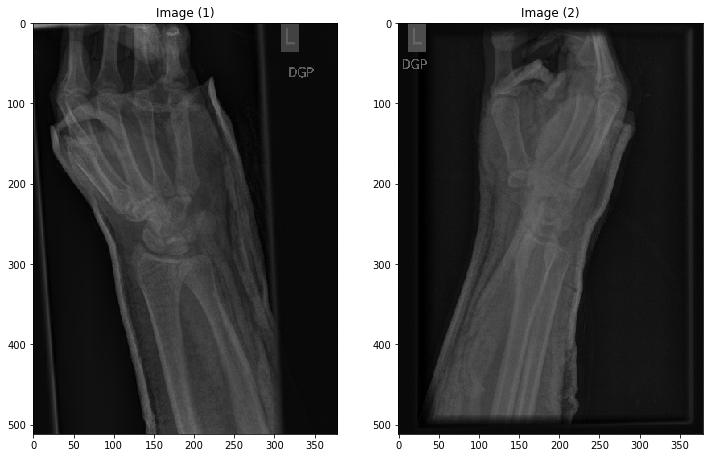

In [0]:
show_images(data)